# 数据可视化作业题目

In [2]:
from IPython.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

In [2]:
data = sns.load_dataset("flights")
data.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [8]:
result_eachyear = data.groupby('year')['passengers'].sum().reset_index()

result_eachmonth = data.groupby('month')['passengers'].sum().reset_index()


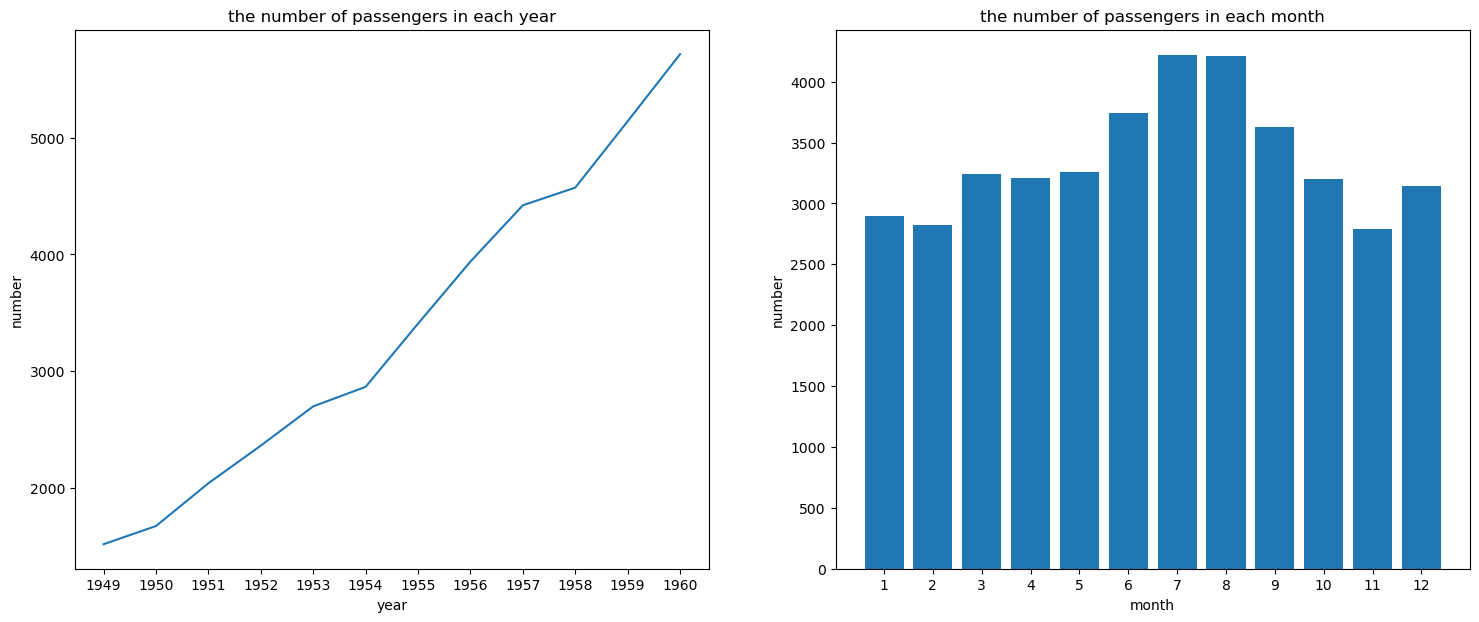

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

#year
axes[0].plot(result_eachyear['year'], result_eachyear['passengers'])

axes[0].set_xticks(result_eachyear['year'],fontsize=1)

axes[0].set_xlabel('year')
axes[0].set_ylabel('number')
axes[0].set_title('the number of passengers in each year')

# month
axes[1].bar(np.array(result_eachmonth.index.tolist())+1, result_eachmonth['passengers'])
axes[1].set_xticks(np.array(result_eachmonth.index.tolist())+1)

axes[1].set_title('the number of passengers in each month')
axes[1].set_xlabel('month')
axes[1].set_ylabel('number')
plt.show()

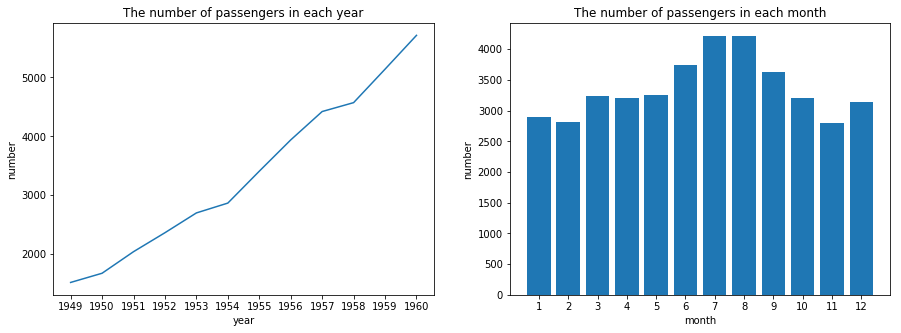

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

In [39]:
data = sns.load_dataset("iris")
data.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
data.iloc[90]

sepal_length           5.5
sepal_width            2.6
petal_length           4.4
petal_width            1.2
species         versicolor
Name: 90, dtype: object

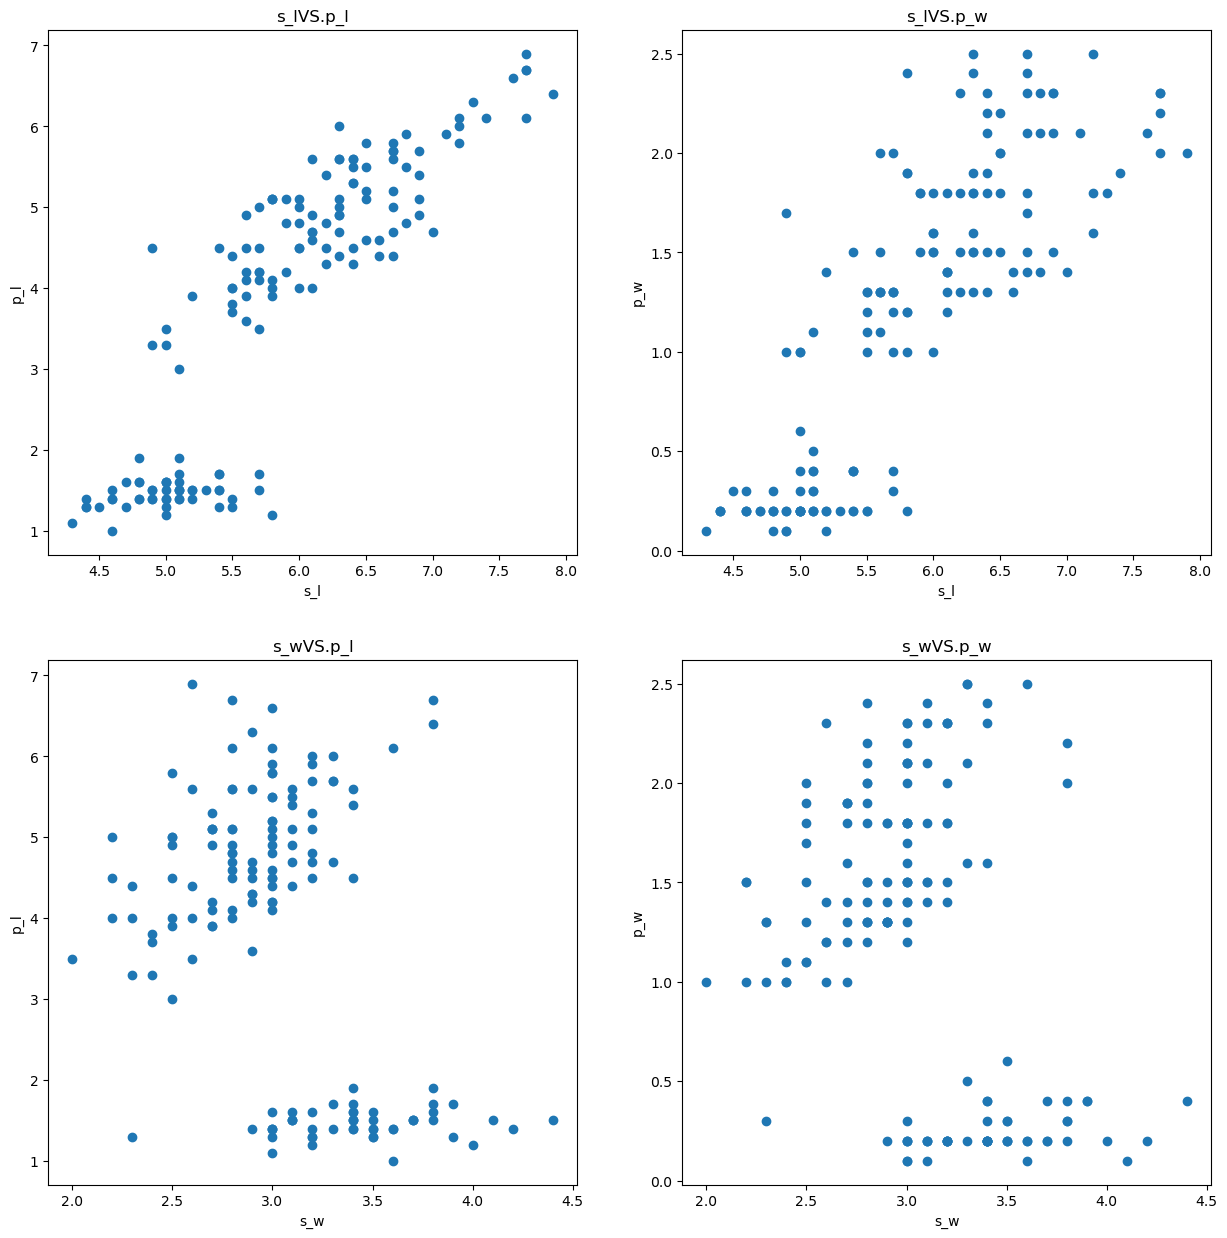

In [47]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

def subgraph(x,y,x_name,y_name,axes,data):
    axes[x][y].scatter(data[x_name],data[y_name])
    axes[x][y].set_xlabel(x_name[0]+x_name[5]+x_name[6])
    axes[x][y].set_ylabel(y_name[0]+y_name[5]+y_name[6])
    axes[x][y].set_title(x_name[0]+x_name[5]+x_name[6]+'VS.'+y_name[0]+y_name[5]+y_name[6])
    
subgraph(0,0,'sepal_length','petal_length',axes,data)
subgraph(0,1,'sepal_length','petal_width',axes,data)
subgraph(1,0,'sepal_width','petal_length',axes,data)
subgraph(1,1,'sepal_width','petal_width',axes,data)


plt.show()

In [56]:
color_dict = {'setosa':'blue','virginica':'black','versicolor':'red'}

data['colors'] = data['species'].map(color_dict)

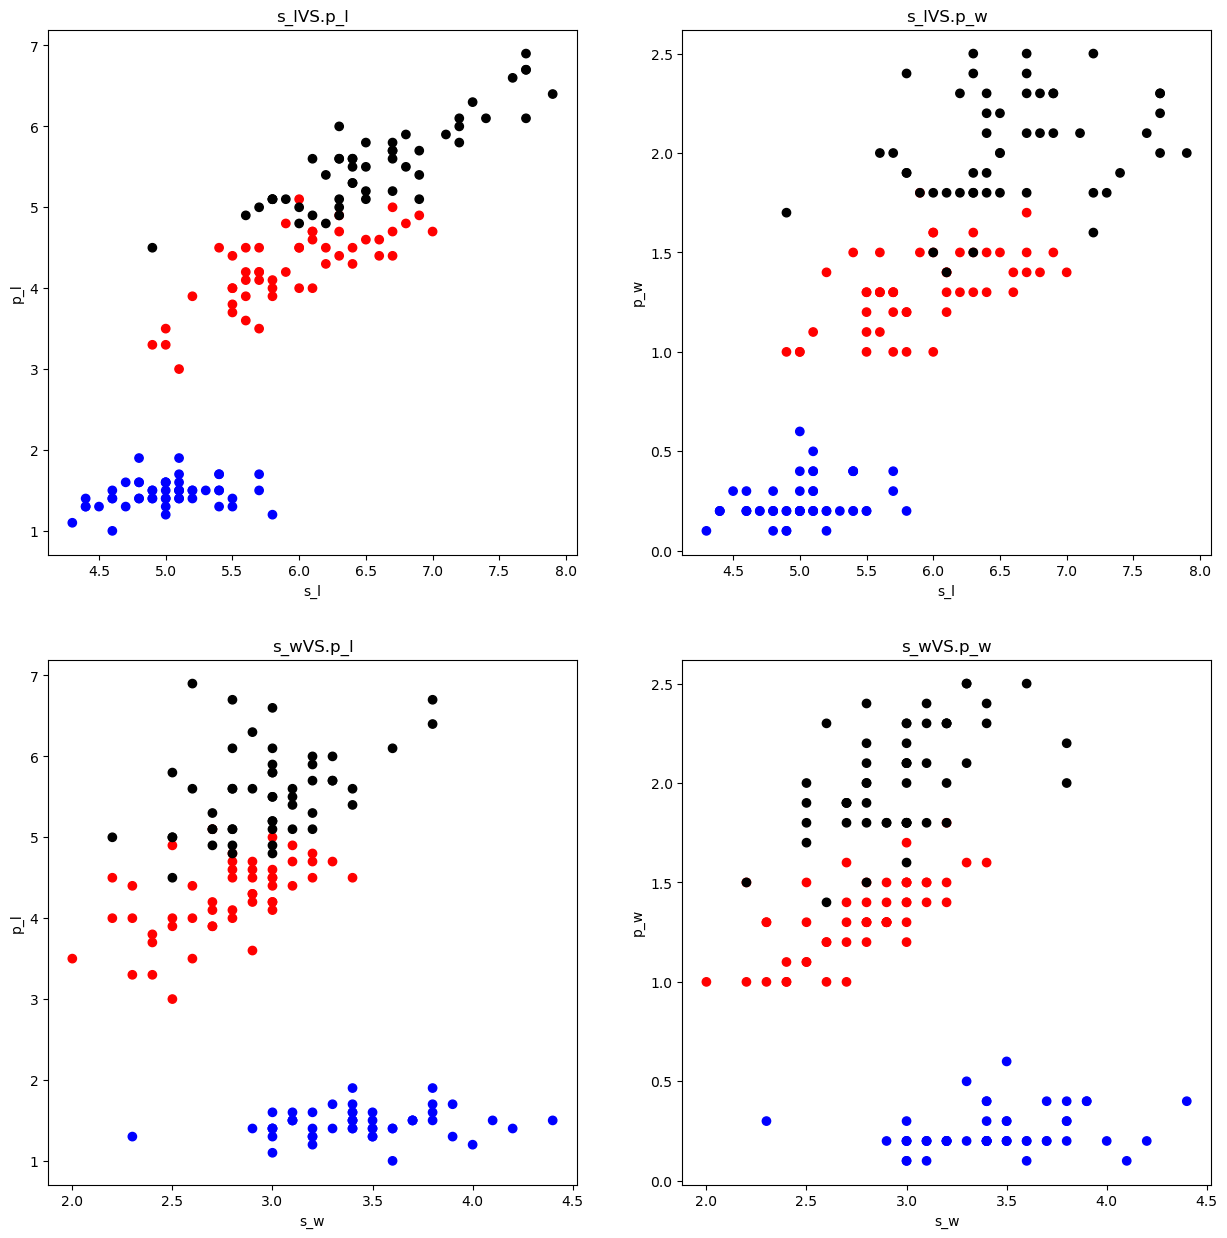

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

def subgraph(x,y,x_name,y_name,axes,data):
    axes[x][y].scatter(data[x_name],data[y_name],c=data['colors'])
    axes[x][y].set_xlabel(x_name[0]+x_name[5]+x_name[6])
    axes[x][y].set_ylabel(y_name[0]+y_name[5]+y_name[6])
    axes[x][y].set_title(x_name[0]+x_name[5]+x_name[6]+'VS.'+y_name[0]+y_name[5]+y_name[6])
    
subgraph(0,0,'sepal_length','petal_length',axes,data)
subgraph(0,1,'sepal_length','petal_width',axes,data)
subgraph(1,0,'sepal_width','petal_length',axes,data)
subgraph(1,1,'sepal_width','petal_width',axes,data)


plt.show()

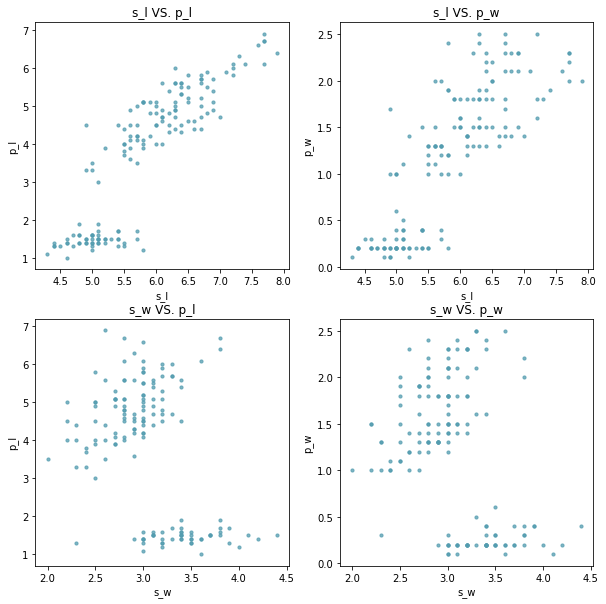

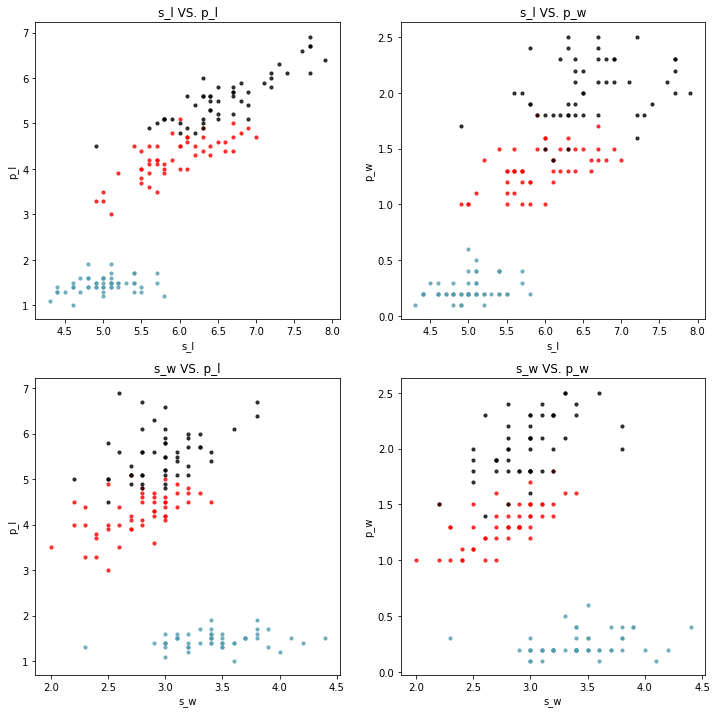

In [59]:
data[data['species'] == 'setosa']['sepal_length']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

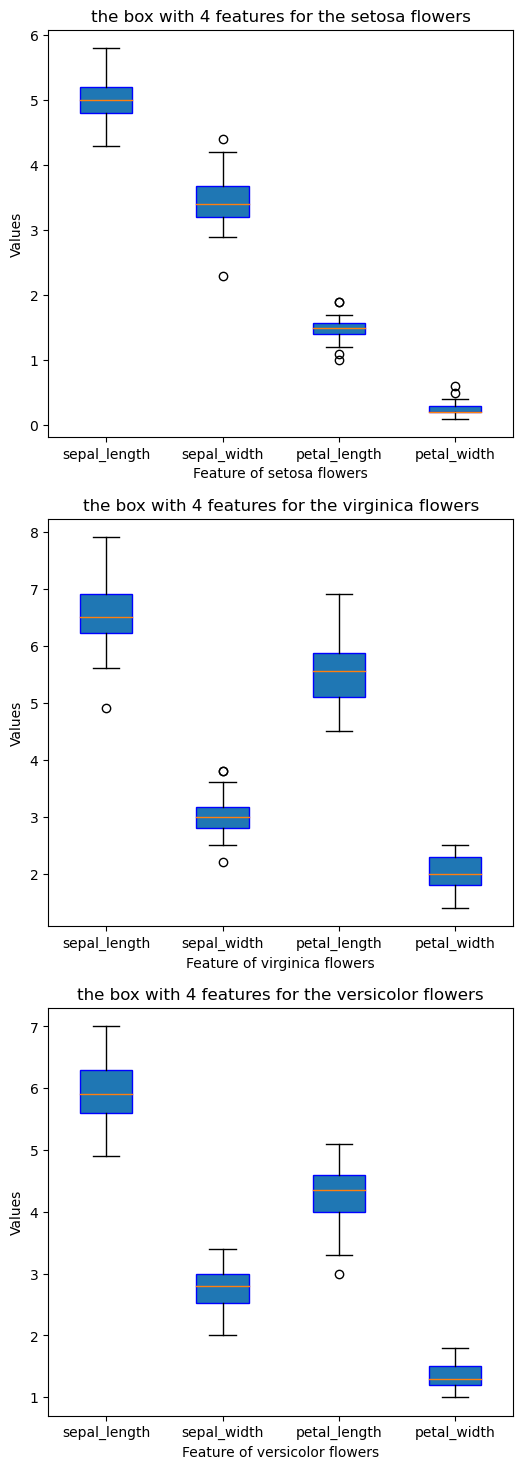

In [80]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))

def subgraph(x,specie,axes,data):

    axes[x].boxplot([data[data['species'] == specie][data.columns[i]] for i in range(4)],
                    labels=data.columns[0:4],
                    patch_artist=True,
                    boxprops=dict(color='blue')
                   )
    axes[x].set_xlabel("Feature of "+specie+" flowers")
    axes[x].set_ylabel("Values")
    axes[x].set_title("the box with 4 features for the "+specie + " flowers")

for idx,i in enumerate(list(set(data['species']))):
    subgraph(idx,i,axes,data)  

plt.show()

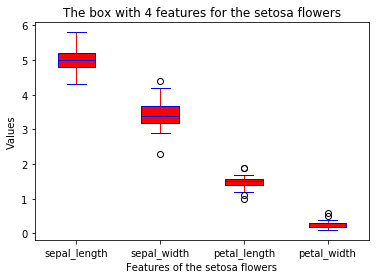

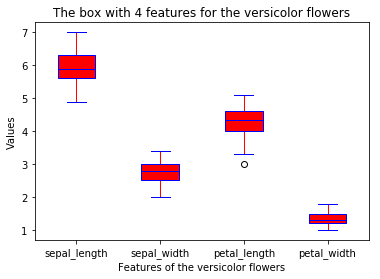

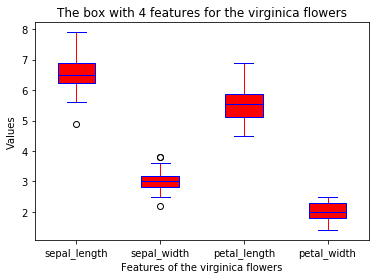

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [3]:
data = sns.load_dataset("tips")
data.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
def scatterplot(x_data, y_data, x_label, y_label, title, ax = None):

    # 创建一个绘图对象
    if ax:
        pass
    else:
        fig, ax = plt.subplots()
    # 调用plt句柄画一个图，返回两个变量fig，ax，分别是figure和 axes的缩写。函数返回一个figure图像和一个子图ax的array列表。
    # 一个fig图里边会套好几个ax，而每个ax会负责当前坐标上的图。所以任何绘制的图形都是在ax上完成的；
    # 而设置整个画布，将是在fig上完成。
    
    # 不显示顶部和右侧的坐标线
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    # 设置数据x_data和y_data、点的大小s、点的颜色color和透明度alpha
    ax.scatter(x_data, y_data, s = 10, color = '#539caf', alpha = 0.75)

    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

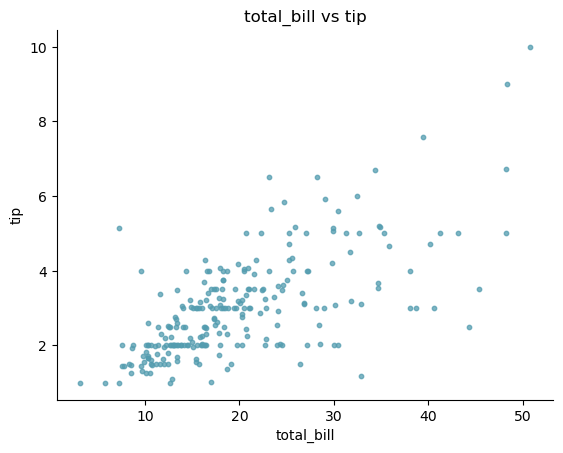

In [5]:
scatterplot(x_data = data['total_bill']
            , y_data = data['tip']
            , x_label = 'total_bill'
            , y_label = 'tip'
            , title = 'total_bill vs tip')

In [6]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import summary_table
x = sm.add_constant(data['total_bill']) # 线性回归增加常数项
y = data['tip']
regr = sm.OLS(y, x) # 普通最小二乘模型，ordinary least square model
res = regr.fit()

# 从模型获得拟合数据
st, result_data, ss2 = summary_table(res, alpha=0.05) # 置信水平alpha=5%，st数据汇总，data数据详情，ss2数据列名
fitted_values = result_data[:,2]

In [7]:
predict_mean_ci_low, predict_mean_ci_upp = result_data[:,4:6].T
import pandas as pd
# 创建置信区间DataFrame，上下界
CI_df = pd.DataFrame(columns = ['x_data', 'low_CI', 'upper_CI'])
CI_df['x_data'] = data['total_bill']
CI_df['low_CI'] = predict_mean_ci_low
CI_df['upper_CI'] = predict_mean_ci_upp
CI_df.sort_values('x_data', inplace = True) # 根据x_data进行排序


In [8]:
def lineplotCI(x_data, y_data, sorted_x, low_CI, upper_CI, x_label, y_label, title):
    # 创建绘图对象
    _, ax = plt.subplots()

    # 绘制预测曲线
    ax.plot(x_data, y_data, lw = 1, color = '#539caf', alpha = 1, label = 'Fit')
    # 绘制置信区间，顺序填充
    ax.fill_between(sorted_x, low_CI, upper_CI, color = '#539caf', alpha = 0.4, label = '95% CI')
    # 添加标题和坐标说明
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    # 显示图例，配合label参数，loc=“best”自适应方式
    ax.legend(loc = 'best')
    return ax

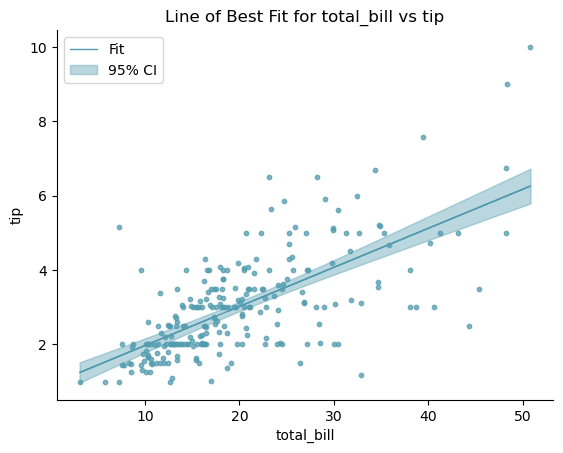

In [9]:
ax = lineplotCI(x_data = data['total_bill']
           , y_data = fitted_values
           , sorted_x = CI_df['x_data']
           , low_CI = CI_df['low_CI']
           , upper_CI = CI_df['upper_CI']
           , x_label = 'total_bill'
           , y_label = 'tip'
           , title = 'Line of Best Fit for total_bill vs tip')

scatterplot(x_data = data['total_bill']
             , y_data = data['tip']
             , x_label = 'total_bill'
             , y_label = 'tip'
             , title = 'Line of Best Fit for total_bill vs tip'
             , ax=ax)

In [10]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [13]:
data.loc[data['sex'] == 'Male', 'tip']

1      1.66
2      3.50
3      3.31
5      4.71
6      2.00
       ... 
236    1.00
237    1.17
239    5.92
241    2.00
242    1.75
Name: tip, Length: 157, dtype: float64

In [36]:
#定义画Feature vs tip的函数
def plot_feature_vs_tip(feature): 
    plt.boxplot([data.loc[data[feature] == i,'tip'] for i in set(data[feature])],
                    labels=[i for i in set(data[feature])],
                    patch_artist=True,
                    boxprops=dict(color='blue')
                   )
    plt.xlabel(feature)
    plt.ylabel("tip")
    plt.title(feature+" for tip")

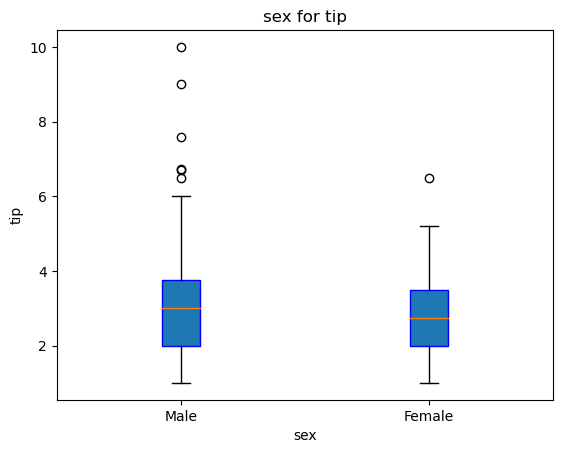

In [37]:
plot_feature_vs_tip("sex")

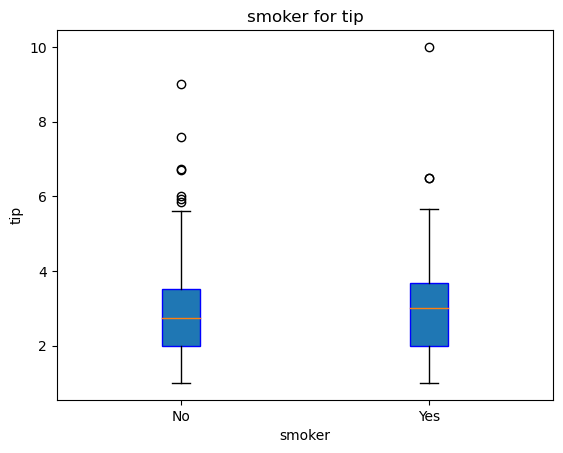

In [38]:
plot_feature_vs_tip("smoker")

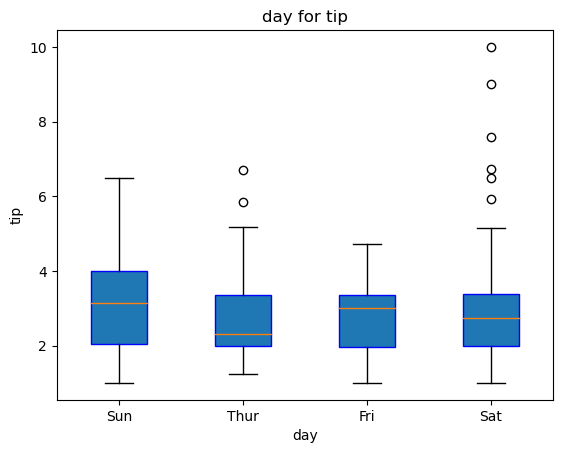

In [39]:
plot_feature_vs_tip("day")

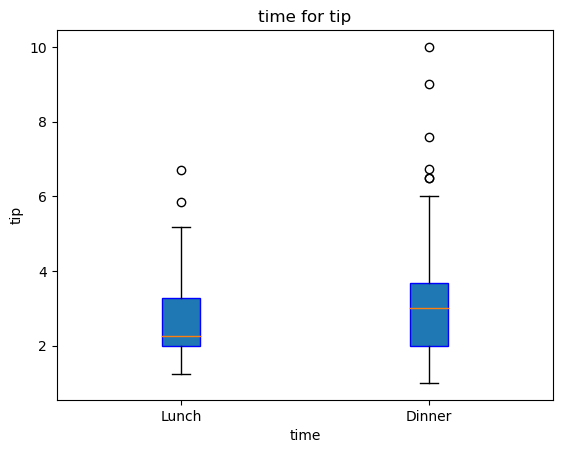

In [41]:
plot_feature_vs_tip("time")

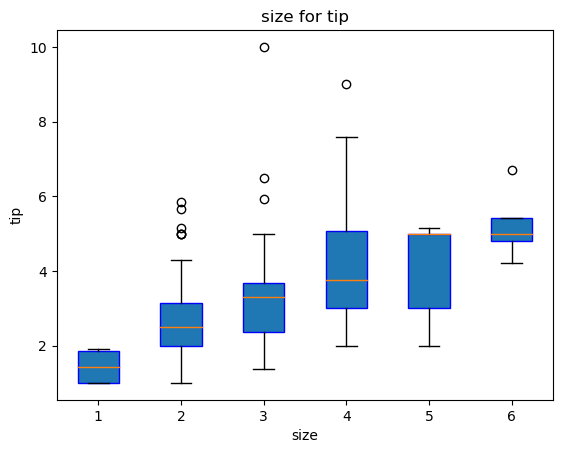

In [42]:
plot_feature_vs_tip("size")

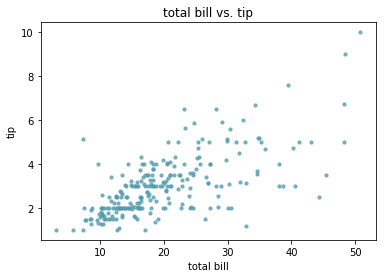

In [100]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 设置每一组柱状图的宽度
    x_data_len = np.arange(len(x_data))
    total_width = 0.8
    # 设置每一个柱状图的宽度
    ind_width = total_width / len(y_data_list)
    # 计算每一个柱状图的中心偏移
    alteration = np.arange(-total_width/2+ind_width/2, total_width/2+ind_width/2, ind_width)

    # 分别绘制每一个柱状图
    for i in range(0, len(y_data_list)):
        # 横向散开绘制
        ax.bar(x_data, y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_xticks(x_data_len + alteration / 2, x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

In [49]:
mean_data = data[['tip', 'smoker', 'sex']].groupby(['smoker','sex']).mean()

In [61]:
type(mean_data)

pandas.core.frame.DataFrame

In [69]:
mean_data['tip'][0]

3.0511666666666666

In [70]:
mean_data

tip
smoker sex             
Yes    Male    3.051167
       Female  2.931515
No     Male    3.113402
       Female  2.773519

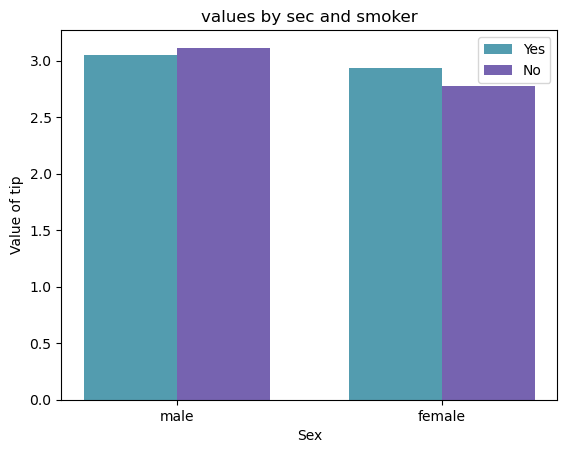

In [104]:
categories = ["male","female"]
values1 = [mean_data['tip'][0],mean_data['tip'][1]]
values2 = [mean_data['tip'][2],mean_data['tip'][3]]

# 设置条形图的宽度
bar_width = 0.35

# 计算并列的条形图的横坐标位置
x_data1 = np.arange(len(categories))
x_data2 = x_data1 + bar_width

# 创建并列的条形图

plt.bar(x_data1, values1, width=bar_width, color='#539caf', label='Yes')
plt.bar(x_data2, values2, width=bar_width, color='#7663b0', label='No')

# 添加标签和标题
plt.xlabel('Sex')
plt.ylabel('Value of tip')
plt.title('values by sec and smoker')
plt.xticks(x_data1 + bar_width / 2, categories)  # 设置横坐标刻度位置

# 添加图例
plt.legend()

# 显示图形
plt.show()


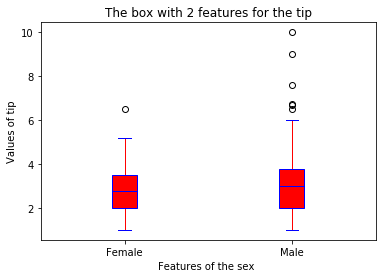

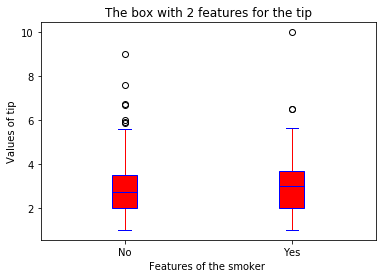

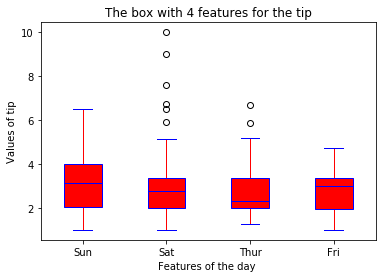

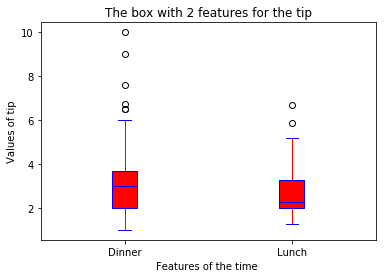

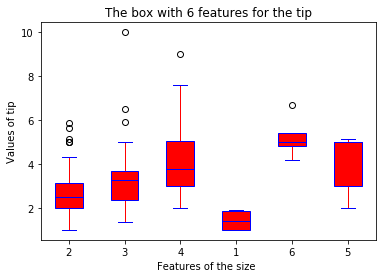

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


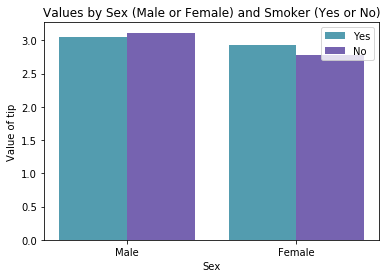

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [105]:
data = sns.load_dataset("titanic")
data.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
data1 = data.groupby("pclass")["survived"].sum()

data2= data.groupby("pclass")["pclass"].count()

data_df = pd.concat([data1, data2], axis=1, keys=["survived","total"])

data_df["unsurvived"] = data_df["total"] - data_df["survived"]

data_df["survived_prop"] = data_df["survived"]/data_df["total"]

data_df["unsurvived_prop"] = data_df["unsurvived"]/data_df["total"]

In [129]:
data_df

,survived,total,unsurvived,survived_prop,unsurvived_prop
pclass,,,,,
1,136,216,80,0.629630,0.370370
2,87,184,97,0.472826,0.527174
3,119,491,372,0.242363,0.757637


In [130]:
def stackedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # 循环绘制堆积柱状图
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x_data, y_data_list[i], color = colors[i], align = 'center', label = y_data_names[i])
        else:
            # 采用堆积的方式，除了第一个分类，后面的分类都从前一个分类的柱状图接着画
            # 用归一化保证最终累积结果为1，下面bottom参数表示纵向从哪里开始画
            ax.bar(x_data, y_data_list[i], color = colors[i], bottom = y_data_list[i - 1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right') # 设定图例位置

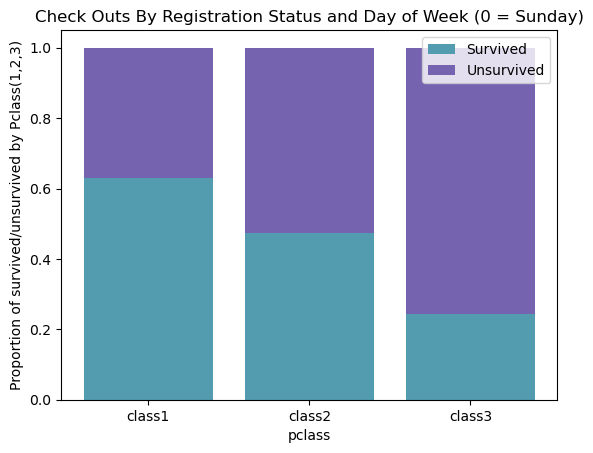

In [132]:
stackedbarplot(x_data = ["class1","class2","class3"]
               , y_data_list = [data_df["survived_prop"], data_df["unsurvived_prop"]]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = "pclass"
               , y_label = 'Proportion of survived/unsurvived by Pclass(1,2,3)'
               , title = 'Proportion of survived/unsurvived by Pclass(1,2,3)')

In [133]:
data1 = data.groupby("sex")["survived"].sum()

data2= data.groupby("sex")["pclass"].count()

data_df = pd.concat([data1, data2], axis=1, keys=["survived","total"])

data_df["unsurvived"] = data_df["total"] - data_df["survived"]

data_df["survived_prop"] = data_df["survived"]/data_df["total"]

data_df["unsurvived_prop"] = data_df["unsurvived"]/data_df["total"]

In [137]:
data_df

,survived,total,unsurvived,survived_prop,unsurvived_prop
sex,,,,,
female,233,314,81,0.742038,0.257962
male,109,577,468,0.188908,0.811092


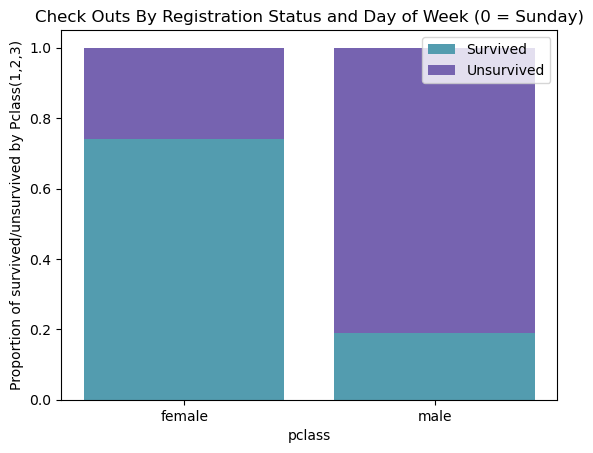

In [136]:
stackedbarplot(x_data = ["female","male"]
               , y_data_list = [data_df["survived_prop"], data_df["unsurvived_prop"]]
               , y_data_names = ['Survived', 'Unsurvived']
               , colors = ['#539caf', '#7663b0']
               , x_label = "pclass"
               , y_label = 'Proportion of survived/unsurvived by sex'
               , title = 'Proportion of survived/unsurvived by sex')

        survived  unservived  total  survived_prop  unsurvived_prop
sex                                                                
female       233         314    314       0.742038              1.0
male         109         577    577       0.188908              1.0


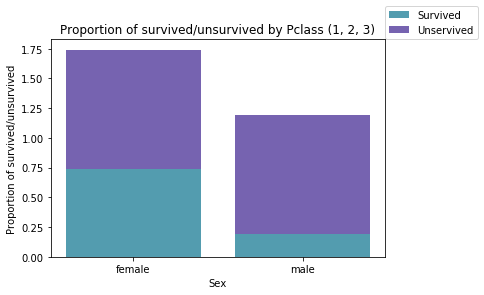

In [143]:
def plot_survived_vs_feature(feature): 
    plt.boxplot([data.loc[data["survived"] == i,feature] for i in set(data["survived"])],
                    labels=[i for i in set(data["survived"])],
                    patch_artist=True,
                    boxprops=dict(color='blue')
                   )
    plt.xlabel("survived")
    plt.ylabel(feature)
    plt.title("The box with 2 teatures "+" for "+ feature)

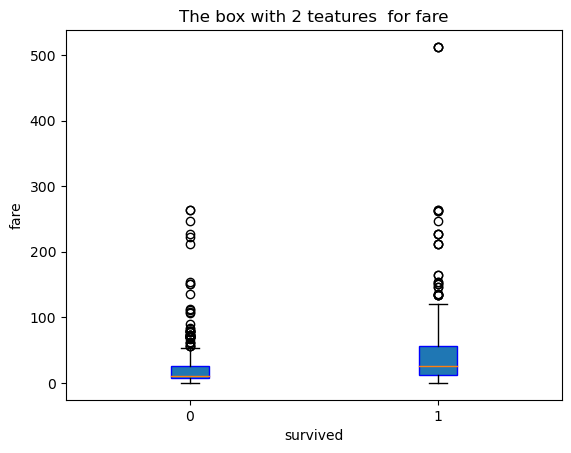

In [144]:
plot_survived_vs_feature("fare")

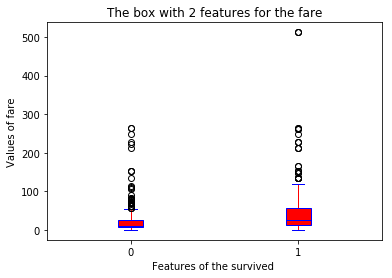

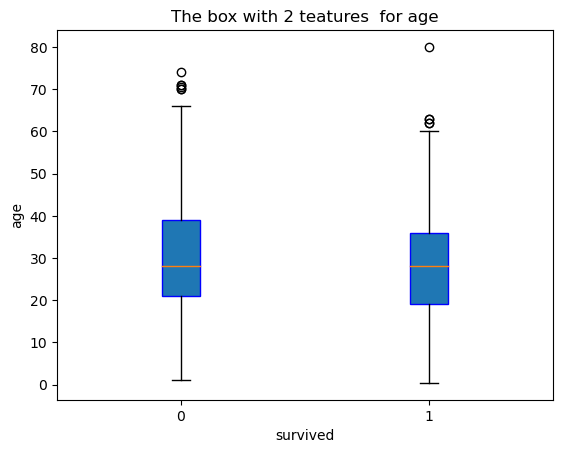

In [152]:
#age 中有nan，因此删除nan行
data = data.dropna(subset=['age'])
plot_survived_vs_feature("age")

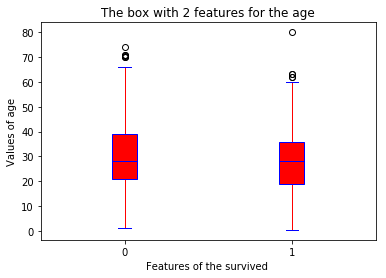

In [153]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [182]:
df1 = data[data["pclass"] == 1]
df2 = data[data["pclass"] == 2]
df3 = data[data["pclass"] == 3]

In [183]:
df1 = df1.groupby("embarked").count()["pclass"]
df2 = df2.groupby("embarked").count()["pclass"]
df3 = df3.groupby("embarked").count()["pclass"]

In [194]:
df3

embarked
C     66
Q     72
S    353
Name: pclass, dtype: int64

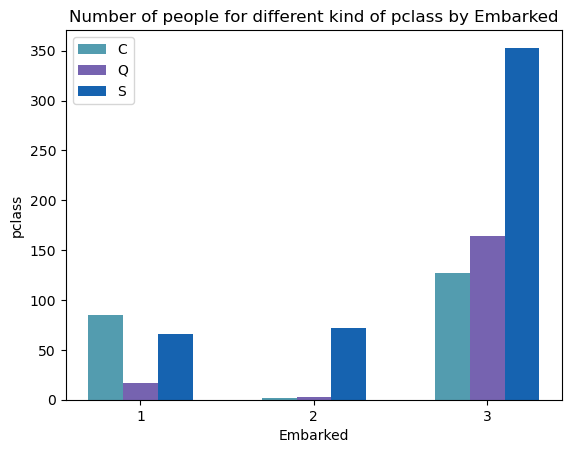

In [196]:
categories = [1,2,3]
values1 = df1
values2 = df2
values3 = df3
# 设置条形图的宽度
bar_width = 0.2

# 计算并列的条形图的横坐标位置
x_data1 = np.arange(len(categories))
x_data2 = x_data1 + bar_width
x_data3 = x_data2 + bar_width
# 创建并列的条形图

plt.bar(x_data1, values1, width=bar_width, color='#539caf', label='C')
plt.bar(x_data2, values2, width=bar_width, color='#7663b0', label='Q')
plt.bar(x_data3, values3, width=bar_width, color='#1663b0', label='S')

# 添加标签和标题
plt.xlabel('Embarked')
plt.ylabel('pclass')
plt.title('Number of people for different kind of pclass by Embarked')
plt.xticks(x_data1 + bar_width, categories)  # 设置横坐标刻度位置

# 添加图例
plt.legend()

# 显示图形
plt.show()

pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


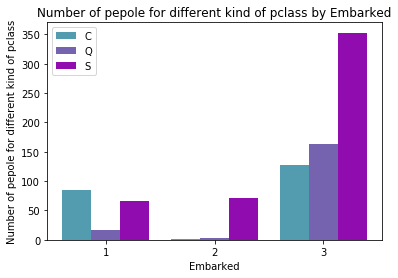

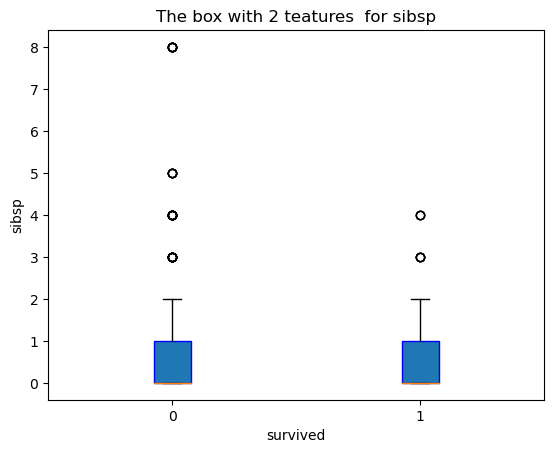

In [197]:
plot_survived_vs_feature("sibsp")

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

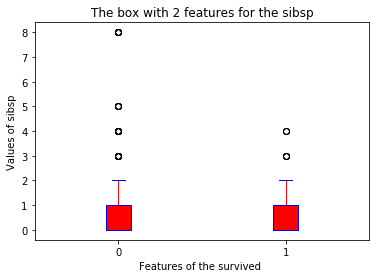

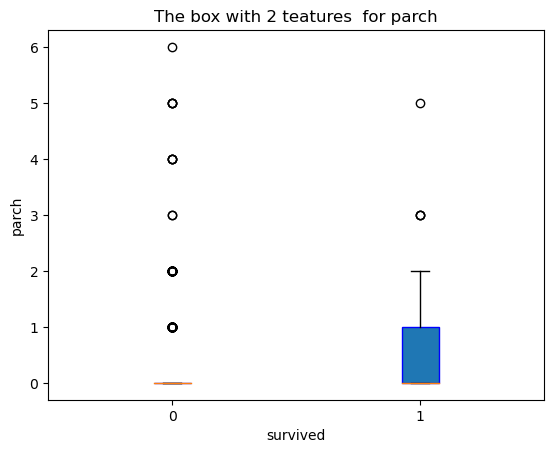

In [198]:
plot_survived_vs_feature("parch")

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

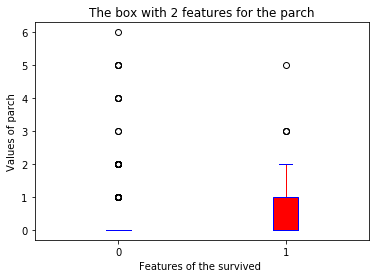

In [215]:
df1 = data[data["survived"] == 0].groupby("alone")["alone"].count()

In [217]:
df2 = data[data["survived"] == 1].groupby("alone")["alone"].count()

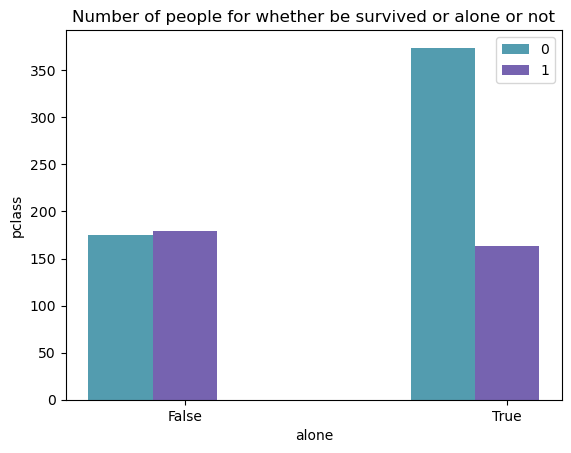

In [222]:
categories = ["False","True"]
values1 = df1
values2 = df2

# 设置条形图的宽度
bar_width = 0.2

# 计算并列的条形图的横坐标位置
x_data1 = np.arange(len(categories))
x_data2 = x_data1 + bar_width

# 创建并列的条形图

plt.bar(x_data1, values1, width=bar_width, color='#539caf', label='0')
plt.bar(x_data2, values2, width=bar_width, color='#7663b0', label='1')


# 添加标签和标题
plt.xlabel('alone')
plt.ylabel('pclass')
plt.title('Number of people for whether be survived or alone or not')
plt.xticks(x_data1 + bar_width, categories)  # 设置横坐标刻度位置

# 添加图例
plt.legend()

# 显示图形
plt.show()

survived    0    1
alone             
False     175  179
True      374  163


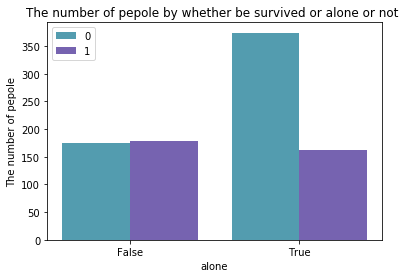